<div style="text-align: center;">
    <img src="img/logo.png" width="400" alt="logo_uba">
</div>

**Alumnos:** <br />
Pablo Martin Gomez Verdini - gomezpablo86@gmail.com <br />
Diego Paciotti Iacchelli - diegopaciotti@gmail.com  <br />
Joaquin Gonzalez - joagonzalez@gmail.com <br />

**Repositorio Github**<br />
https://github.com/FIUBA-CEIA-18Co2024/IIA-TP2 <br />


In [12]:
# Setup
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Load the dataset
housing = fetch_california_housing()

print(f'Data shape: {housing.data.shape}\nTarget shape: {housing.target.shape}')
print(f'Features: {housing.feature_names}')

Data shape: (20640, 8)
Target shape: (20640,)
Features: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [24]:
# Create a DataFrame with the features
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

# Add the target column to the DataFrame
df['Target'] = housing.target

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print('Correlation matrix (Full)')
print(correlation_matrix)
print('\n')

# Correlation between features
print("Correlation between features:")
print(correlation_matrix.loc[housing.feature_names, housing.feature_names])
print('\n')

# Correlation between features and target
print("Correlation between features and target:")
correlation_matrix_features_target = correlation_matrix['Target'].loc[housing.feature_names]
correlation_matrix_features_target.name = 'Target'
print(pd.DataFrame(correlation_matrix_features_target))
print('\n')

Correlation matrix
              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Target      0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude    Target  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0

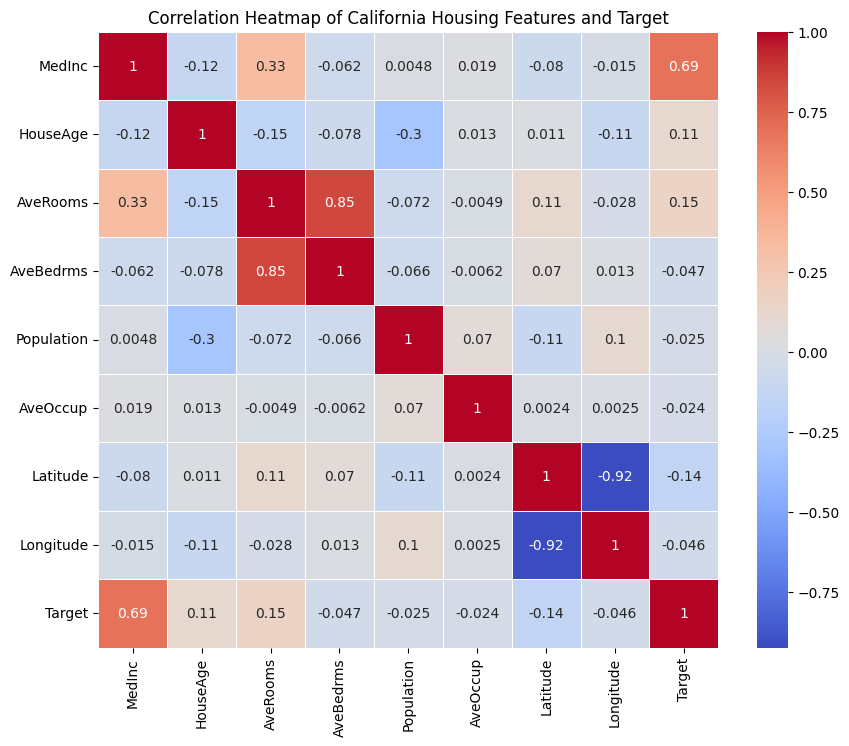

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap of California Housing Features and Target')
plt.show()